In [78]:
#SPAM DETECTION IN EMAILS USING NLP

In [2]:
#importing necessary libraries

In [3]:
import torch

In [4]:
import torch.nn as nn
import torch.optim as optim

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [7]:
import pandas as pd
import numpy as np
import re
import nltk

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Load a CSV file
data = pd.read_csv('spam.csv',encoding='latin1')  # Assuming 'spam.csv' contains two columns: 'text' and 'label'


In [11]:
print(data.head())

  label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [12]:
#prepossing the data

In [13]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text


In [14]:
# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

In [15]:
print(data.columns)

Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'cleaned_text'],
      dtype='object')


In [16]:
print(data.columns)

Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'cleaned_text'],
      dtype='object')


In [17]:
data = data.rename(columns={data.columns[0]: 'label'})

In [18]:
print(data.columns)

Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'cleaned_text'],
      dtype='object')


In [19]:
data = data.rename(columns={data.columns[1]: 'text'})

In [20]:
print(data.columns)

Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'cleaned_text'],
      dtype='object')


In [21]:
data['cleaned_text'] = data['text'].apply(clean_text)

In [22]:
# Tokenization and Stop-word removal
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [23]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['preprocessed_text'] = data['cleaned_text'].apply(preprocess_text)

In [24]:
#Convert Text to TF-IDF Vectors

In [25]:
# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
X = vectorizer.fit_transform(data['preprocessed_text']).toarray()

In [26]:

# Labels (0 for ham, 1 for spam)
y = data['label'].apply(lambda x: 1 if x == 'spam' else 0).values


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Model Development
#Define the Neural Network

In [29]:
class SpamClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SpamClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out


In [30]:
#Training the Model
#Hyperparameters and Model Setup

In [31]:
input_size = X_train.shape[1]  # Number of features (TF-IDF size)
hidden_size = 128  # Can be tuned
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [32]:
# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [33]:

# Initialize model, loss function, and optimizer
model = SpamClassifier(input_size, hidden_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [34]:
#Training Loop

In [35]:
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    epoch_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [1/10], Loss: 0.6790
Epoch [2/10], Loss: 0.6752
Epoch [3/10], Loss: 0.6714
Epoch [4/10], Loss: 0.6676
Epoch [5/10], Loss: 0.6637
Epoch [6/10], Loss: 0.6598
Epoch [7/10], Loss: 0.6557
Epoch [8/10], Loss: 0.6515
Epoch [9/10], Loss: 0.6471
Epoch [10/10], Loss: 0.6426


In [36]:
#Evaluation
#Model Evaluation on Test Data


In [37]:
model.eval()
with torch.no_grad():
    # Get predictions
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()  # Convert probabilities to binary 0/1

    # Convert to NumPy for evaluation
    predictions_np = predictions.numpy()
    y_test_np = y_test_tensor.numpy()

    # Accuracy
    accuracy = accuracy_score(y_test_np, predictions_np)
    print(f'Accuracy: {accuracy:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test_np, predictions_np)
    print('Confusion Matrix:')
    print(cm)


Accuracy: 0.8655
Confusion Matrix:
[[965   0]
 [150   0]]


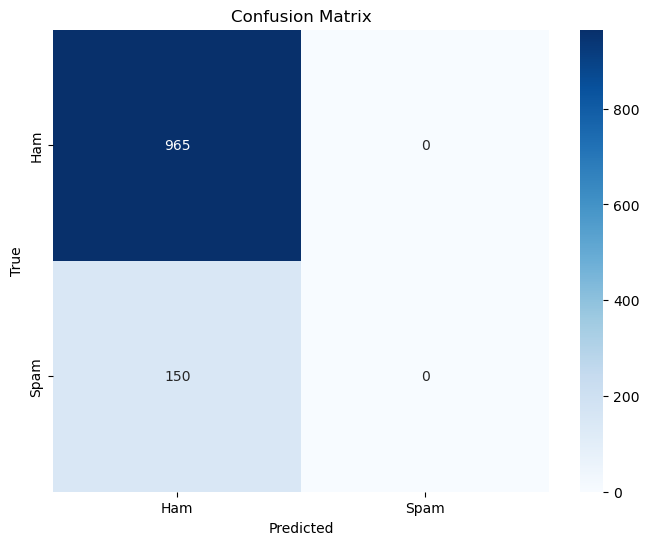

In [38]:
# Compute the confusion matrix
cm = confusion_matrix(y_test_np, predictions_np)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()